In [35]:
import seaborn as sns
import numpy as np
import pandas as pd

from bisect import bisect_left
from scipy.stats import norm, cumfreq
import matplotlib.pyplot as plt

In [36]:
!ls ../data

master_2013.csv  master_2014.csv  master.csv  simple_combined.csv


In [37]:
df = pd.read_csv('../data/master_2014.csv')

# First float all values in throughput and latency columns
df['ThroughputData.Mean'] = df['ThroughputData.Mean'].apply(lambda x: np.float64(x))
df['LatencyData.Mean'] = df['LatencyData.Mean'].apply(lambda x: np.float64(x))
df['ThroughputData.Med'] = df['ThroughputData.Med'].apply(lambda x: np.float64(x))
df['LatencyData.Med'] = df['LatencyData.Med'].apply(lambda x: np.float64(x))

In [38]:
import statsmodels.api as sm # recommended import according to the docs

%matplotlib inline

df.info()
df['ThroughputData.Med'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194239 entries, 0 to 194238
Columns: 117 entries, Key to Unnamed: 16
dtypes: float64(79), object(38)
memory usage: 174.9+ MB


0    1.404963
1    5.867318
2    1.889566
3    0.463903
4    9.881799
Name: ThroughputData.Med, dtype: float64

In [39]:
medianLatencies = np.asarray(df['LatencyData.Med'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 1200 else x))
clean = []
for ml in medianLatencies:
    if ml > 0:
        clean.append(ml)
sml = sorted(clean)

ecdf = sm.distributions.ECDF(sml)

med_lat_x = np.linspace(min(sml), max(sml))
med_lat_y = ecdf(med_lat_x)

In [40]:
meanLatencies = np.asarray(df['LatencyData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 1200 else x))
clean1 = []
for meanl in meanLatencies:
    if meanl > 0:
        clean1.append(meanl)
smeanl = sorted(clean1)

ecdf = sm.distributions.ECDF(smeanl)

mean_lat_x = np.linspace(min(smeanl), max(smeanl))
mean_lat_y = ecdf(mean_lat_x)

In [64]:
medThru = np.asarray(df['ThroughputData.Med'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 200 else x))
clean2 = []
for medt in medThru:
    if medt > 0:
        clean2.append(medt)
smedthru = sorted(clean2)

ecdf = sm.distributions.ECDF(smedthru)

med_thru_x = np.linspace(min(smedthru), max(smedthru))
med_thru_y = ecdf(med_thru_x)

In [65]:
meanThru = np.asarray(df['ThroughputData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 200 else x))
clean3 = []
for meant in meanThru:
    if meant > 0:
        clean3.append(meant)
smeanthru = sorted(clean3)

ecdf = sm.distributions.ECDF(smeanthru)

mean_thru_x = np.linspace(min(smeanthru), max(smeanthru))
mean_thru_y = ecdf(mean_thru_x)

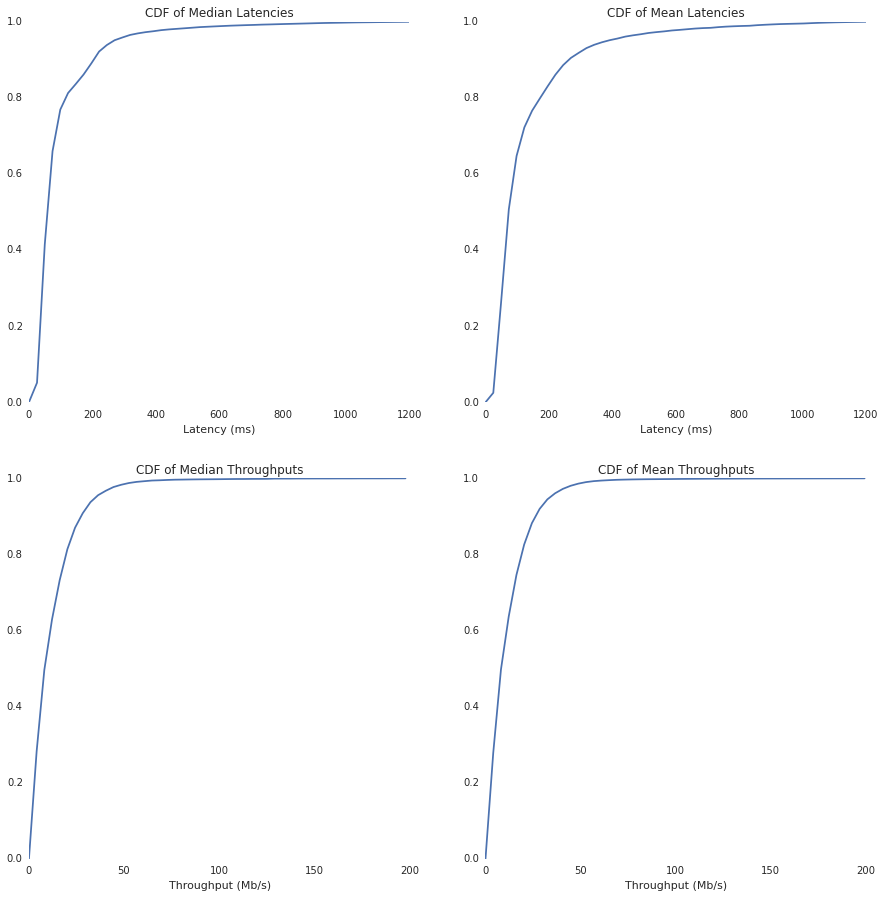

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax0, ax1, ax2, ax3 = axes.flat

ax0.plot(med_lat_x, med_lat_y)
ax0.set_title("CDF of Median Latencies")
ax0.set_xlabel("Latency (ms)")
ax0.grid(True)

ax1.plot(mean_lat_x, mean_lat_y)
ax1.set_title("CDF of Mean Latencies")
ax1.set_xlabel("Latency (ms)")
ax1.grid(True)

ax2.plot(med_thru_x, med_thru_y)
ax2.set_title("CDF of Median Throughputs")
ax2.set_xlabel("Throughput (Mb/s)")
ax2.grid(True)

ax3.plot(mean_thru_x, mean_thru_y)
ax3.set_title("CDF of Mean Throughputs")
ax3.set_xlabel("Throughput (Mb/s)")
ax3.grid(True)

#fig.tight_layout()
fig.show()

In [74]:
df2013 = pd.read_csv('../data/master_2013.csv')
buffRatio = df2013[np.isfinite(df2013['YouTubeStats.BuffRatio'])]
cols = buffRatio.columns.tolist()
buffRatio['YouTubeStats.BuffRatio'].head()

384    0.046999
441    0.042403
841    0.027644
939    0.042443
975    0.026659
Name: YouTubeStats.BuffRatio, dtype: float64

In [68]:
buffRatio['YouTubeStats.BuffRatio'] = buffRatio['YouTubeStats.BuffRatio'].apply(lambda x: np.float(x))
#meanThroughputs = np.asarray(df['ThroughputData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x < 0 else x))
brts = np.asarray(buffRatio['YouTubeStats.BuffRatio'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x < 0 else x))

/playpen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
brts

array([ 0.04699922,  0.04240263,  0.02764447,  0.04244347,  0.0266594 ,
        0.03365418,  0.03082986,  0.01280382,  0.00933283,  0.02957554,
        0.01661249,  0.02809197,  0.00929768,  0.13885449,  0.04889628,
        0.03877208,  0.11497107,  0.0195461 ,  0.00750287,  0.01295875,
        0.03948161,  0.12142143,  0.02917438,  0.05255672,  0.04990622,
        0.05095557,  0.03660674,  0.02065752,  0.03614475,  0.22820263,
        0.63645938,  0.44339623,  0.07461468,  0.02576032,  0.17201973,
        0.03693133,  0.03926968,  0.03652391,  0.08066141,  0.09920991,
        0.0947682 ,  0.02803792,  0.00989595,  0.0416947 ,  0.01958567,
        0.0508759 ,  0.09389116,  0.12219593,  0.03188361,  0.02432804,
        0.01644614,  0.01758258,  0.03399361,  0.01819391,  0.05835872,
        0.00796328,  0.01015598,  0.03125839,  0.02281101,  0.00808022,
        0.0133814 ,  0.02060875,  0.0075442 ,  0.01351543,  0.0171544 ,
        0.00759679,  0.01144503,  0.01388508,  0.04024689,  0.01

In [70]:
clean4 = []
for b in brts:
    if b > 0:
        clean4.append(b)
sbrts = sorted(clean4)

ecdf = sm.distributions.ECDF(sbrts)

brts_x = np.linspace(min(sbrts), max(sbrts))
brts_y = ecdf(brts_x)

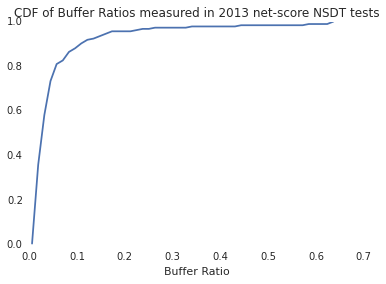

In [75]:
plt.plot(brts_x, brts_y)

plt.xlabel('Buffer Ratio')
plt.title('CDF of Buffer Ratios measured in 2013 net-score NSDT tests')
plt.grid(True)
plt.show()